# 2010

In [17]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a dataframe
nba = pd.read_csv('nba_games.csv')

In [5]:
# Subset Data from 2010 Season
nba_2010 = nba[nba.year_id == 2010]

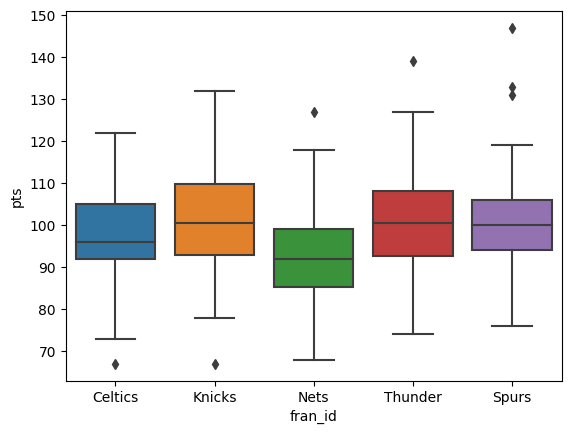

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a side-by-side boxplots from frand_id and pts
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.savefig('2010boxplot.png')
plt.show()
plt.clf()

`Relationship between Categorical variables
 There's a relationship between the game result and the game location?`

In [18]:
# Create a contingency table of frequencies
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


In [8]:
# Convert location_result_freq to proportions 
location_result_proportion = location_result_freq/len(nba_2010)
location_result_proportion

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


In [9]:
# calculating the expected contingency table
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)

[[119. 119.]
 [106. 106.]]


In [10]:
# calculating the Chi-Square statistic
print(chi2)

6.501704455367053


`The expected contingency table shows differences in contrast to the one above and we can see that the chi2 is more than 4 which represents a possible association.`

`Relationship Between Quantitative Variables
 There's a relationship between point_diff and forecast?`

In [19]:
# calculate the covariance between point_diff and forecast
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_cov)

[[1.86559287e+02 1.37461257e+00]
 [1.37461257e+00 5.22668307e-02]]


In [14]:
# I am calculating the strength of the correlation
point_diff_forecast_corr = pearsonr(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_corr)
# The printed result is a tuple with two values: the Pearson correlation coefficient and the p-value
# In this case, the correlation coefficient is 0.44 and the p-value is 9.41
# The correlation coefficient indicates a moderate positive correlation between the two variables
# while the p-value indicates that the probability of this correlation being chance is extremely low

(0.4402088708468082, 9.410391573138826e-23)


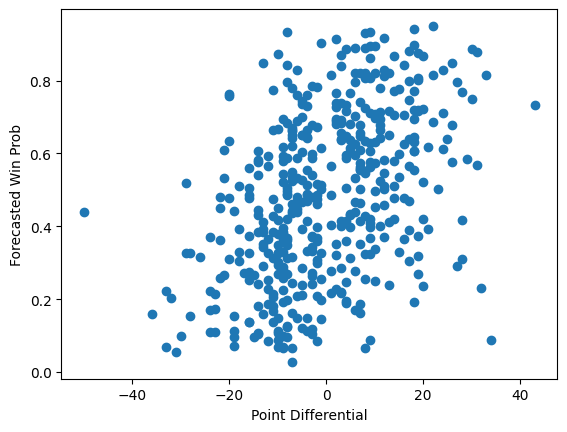

In [16]:
# Create a scatter plot of point_diff and forecast
plt.scatter('point_diff', 'forecast', data = nba_2010,)
plt.xlabel('Point Differential')
plt.ylabel('Forecasted Win Prob')
plt.show()

`We can conclude that there is a moderate relationship between the difference in points and the predicted probability of victory in the basketball games of the 2010 NBA season. However, we must take into account that the correlation does not imply causation, so we cannot affirm that the difference in points is the only cause of the predicted probability of victory`